# Construction Planning and Analysis (Data Exploration)

<h3>Table of contents </h3>
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#preliminary">Preliminary Observations</a></li>
<li><a href="#datacleaning">Data Cleaning</a>  </li>  
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>   
</ul>

<a id='wrangling'></a>
<h2> Data Wrangling </h2>

In [110]:
#import packages
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
#Read excel file 
cons=pd.read_excel('Activity_Anonymized_Dataset.xlsx')
cons.head()

,_deleted,id,projectid,groupid,name,title,description,planstart,planend,actualstart,...,custom,creation date,tagids,trackingstart,trackingend,milestoneid,createdby,deletedby,startedby,completedby
0,0,2E5B227FB651EACE94EB9346105C69,2.0,AA6735140E8FE46BEA74054B34E153,56897.0,Installation,NaN,2019-07-31 18:00:00,2019-08-01 18:00:00,NaN,...,NaN,2019-07-25 06:47:00,NaN,2019-08-26 13:00:00,2019-08-27 13:00:00,NaN,28901888f98a3b4685f2d42a83aa19a72b063da6,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c
1,0,68AC6663FDE7C20EBC22598C0DC3FE,2.0,11B2FEF3016FDF2D603F75CA327D55,57064.0,Installation,NaN,2019-07-31 18:00:00,2019-08-01 18:00:00,NaN,...,NaN,2019-07-25 08:04:00,NaN,2019-08-13 18:00:00,2019-08-14 18:00:00,NaN,8d5e69c044bb397eb17dc24f5ae9bf35a68b7054,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c
2,0,95D6AE9C11757AD4AE6D77396283D2,2.0,AA6735140E8FE46BEA74054B34E153,56896.0,Lifting,NaN,2019-07-31 14:00:00,2019-07-31 18:00:00,NaN,...,NaN,2019-07-25 06:47:00,NaN,2019-08-25 12:00:00,2019-08-25 16:00:00,NaN,28901888f98a3b4685f2d42a83aa19a72b063da6,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c
3,0,B9AD71546EAF3C57743D4C59BC43B8,2.0,11B2FEF3016FDF2D603F75CA327D55,57063.0,Lifting,NaN,2019-07-31 14:00:00,2019-07-31 18:00:00,NaN,...,NaN,2019-07-25 08:04:00,NaN,2019-08-13 14:00:00,2019-08-13 18:00:00,NaN,8d5e69c044bb397eb17dc24f5ae9bf35a68b7054,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c
4,0,7B8BE28699C29B5A4A9DA2BD1C11BD,2.0,AA6735140E8FE46BEA74054B34E153,56895.0,Module,NaN,2019-07-31 12:00:00,2019-07-31 14:00:00,NaN,...,NaN,2019-07-25 06:47:00,NaN,2019-08-25 10:00:00,2019-08-25 12:00:00,NaN,28901888f98a3b4685f2d42a83aa19a72b063da6,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c


In [111]:
#Checking number of rows and columns
cons.shape

(45000, 31)

In [112]:
#Information about columns
cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 31 columns):
_deleted         45000 non-null int64
id               45000 non-null object
projectid        42803 non-null float64
groupid          42803 non-null object
name             42803 non-null float64
title            42803 non-null object
description      2698 non-null object
planstart        42802 non-null datetime64[ns]
planend          42803 non-null datetime64[ns]
actualstart      10897 non-null object
actualend        10668 non-null datetime64[ns]
status           45000 non-null int64
previousids      41940 non-null object
assetid          0 non-null float64
templateids      5699 non-null object
assignees        45000 non-null object
companyids       6 non-null object
teamids          42436 non-null object
starttime        45000 non-null int64
endtime          45000 non-null int64
startime         45000 non-null int64
custom           5677 non-null object
creation date    45000

In [113]:
#Check count of null values for each column
cons.isna().sum()

_deleted             0
id                   0
projectid         2197
groupid           2197
name              2197
title             2197
description      42302
planstart         2198
planend           2197
actualstart      34103
actualend        34332
status               0
previousids       3060
assetid          45000
templateids      39301
assignees            0
companyids       44994
teamids           2564
starttime            0
endtime              0
startime             0
custom           39323
creation date        0
tagids           45000
trackingstart       26
trackingend         20
milestoneid      44304
createdby            0
deletedby            0
startedby            0
completedby          0
dtype: int64

In [114]:
#Checking fpr duplicated rows
cons.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002726528CD68>,
      dtype=object)

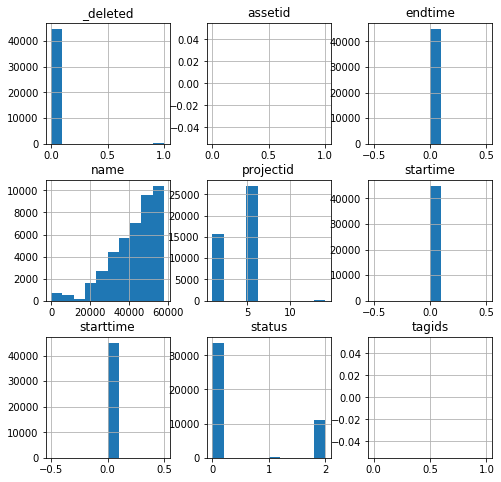

In [115]:
#Explore data and plot histogram for getting an overview
cons.hist(figsize=(8,8))

<a id='preliminary'></a>
<h3>Preliminary Observations:</h3>
1. There are about <b>45k</b> number of records and <b>31 </b>columns.<br>
2. Columns <b>'Deleted','Assetid','endtime','name','projectid', 'startime','startime','status' and 'tagids'</b> are numerical variables.<br>
3. From the above data, <b>'starttime' and 'startime'</b> look like similar columns,and both have just 0 values.We must further explore to know more about these variables. Also, they should be converted into datetime format in the datacleaning process if the columns are required.<br>
4. <b>Name</b> is identified as a numeric as well as opposed to a String datatype. Data cleaning is required for this variable.<br>
5. <b>'Deleted'</b> column seems to be dichotomous but further exploration is required to  know if this column is useful or not.<br>
6. Almost all the records have missing or null values present. Further investigation required for these columns.<br>
7. No duplicate records found in the dataset.
8. Some variables seem to have datatypes not adhering to the variable name. For example, <b>'Status'</b> looks like a string column but is numeric in nature,<b> endtime</b> should be of date time format but is numerical in this dataset. Such variables should be further explored.


<a id='datacleaning'></a>
<h2>Data Cleaning</h2>

In [116]:
cons['starttime'].value_counts()

0    45000
Name: starttime, dtype: int64

In [117]:
cons['startime'].value_counts()

0    45000
Name: startime, dtype: int64

In [118]:
cons['endtime'].value_counts()

0    45000
Name: endtime, dtype: int64

In [119]:
cons.drop(columns=['startime','starttime','endtime'],axis=1,inplace=True)

The three columns are alike and just have 0s so we can drop them as they will not be useful in our analysis.

In [120]:
#Confirming changes
cons.columns

Index(['_deleted', 'id', 'projectid', 'groupid', 'name', 'title',
       'description', 'planstart', 'planend', 'actualstart', 'actualend',
       'status', 'previousids', 'assetid', 'templateids', 'assignees',
       'companyids', 'teamids', 'custom', 'creation date', 'tagids',
       'trackingstart', 'trackingend', 'milestoneid', 'createdby', 'deletedby',
       'startedby', 'completedby'],
      dtype='object')

In [121]:
#Since the histograms didn't show much info about tagids and asset ids, exploring it
cons['assetid'].isnull().sum()

45000

In [122]:
cons['tagids'].isnull().sum()

45000

The two columns above again seem to have null values, let us drop them


In [123]:
#Dropping 'assetid' and'tagids 
cons.drop(columns=['assetid','tagids'],axis=1,inplace=True)

In [124]:
#confirming changes
cons.columns

Index(['_deleted', 'id', 'projectid', 'groupid', 'name', 'title',
       'description', 'planstart', 'planend', 'actualstart', 'actualend',
       'status', 'previousids', 'templateids', 'assignees', 'companyids',
       'teamids', 'custom', 'creation date', 'trackingstart', 'trackingend',
       'milestoneid', 'createdby', 'deletedby', 'startedby', 'completedby'],
      dtype='object')

In [125]:
#Exploring deleted column
cons['_deleted'].value_counts()

0    44808
1      192
Name: _deleted, dtype: int64

The above column is binary in nature but doesn't make much sense on how it can be helpful for our analysis, so we drop this column as well

In [126]:
cons.drop(columns=['_deleted'],axis=1,inplace=True)

In [127]:
#confirming changes
cons.columns

Index(['id', 'projectid', 'groupid', 'name', 'title', 'description',
       'planstart', 'planend', 'actualstart', 'actualend', 'status',
       'previousids', 'templateids', 'assignees', 'companyids', 'teamids',
       'custom', 'creation date', 'trackingstart', 'trackingend',
       'milestoneid', 'createdby', 'deletedby', 'startedby', 'completedby'],
      dtype='object')

In [128]:
#Investigating status variable
cons['status'].value_counts()

0    33686
2    11123
1      191
Name: status, dtype: int64

In [129]:
cons['status'].isnull().sum()

0

No missing values found for 'status'

In [130]:
#Exploring name variable
cons['projectid'].value_counts()

6.0     27035
2.0     15334
1.0       324
14.0       70
8.0        36
4.0         4
Name: projectid, dtype: int64

In [131]:
#Checking the uniqueness if 'id' column
cons['id'].nunique()

45000

In [132]:
#Checking the uniqueness if 'groupid' column
cons['groupid'].nunique()

1064

Since in our preliminary observations, we found that 'project id','name','groupid','title' have 2197 missing values, let us drop those rows.

In [133]:
#Find if the index corresponding to null values of project id is the same index of groupid for confirming before dropping those rows
a=cons[cons['projectid'].isnull()].index.tolist()
b=cons[cons['groupid'].isnull()].index.tolist()
c=cons[cons['name'].isnull()].index.tolist()
d=cons[cons['title'].isnull()].index.tolist()
(a==b==c==d)

True

In [134]:
#drop those 2197 rows which consist of missing values
cons.drop(a,inplace=True)

In [135]:
#Confirming changes
cons['groupid'].isnull().sum()

0

In [136]:
#Exploring actualstart and actualend since we observed around 34000 null values from the info
cons['actualstart'].nunique()

3913

In [137]:
cons['actualend'].nunique()

3884

In [138]:
cons['description'].isnull().sum()

40105

Since there are many null values, we can drop these columns and instead look at tracking end and tracking start which look similar

In [139]:
#drop columns
cons.drop(columns=['actualstart','actualend','description'],axis=1,inplace=True)

In [140]:
#confirming changes
cons.columns

Index(['id', 'projectid', 'groupid', 'name', 'title', 'planstart', 'planend',
       'status', 'previousids', 'templateids', 'assignees', 'companyids',
       'teamids', 'custom', 'creation date', 'trackingstart', 'trackingend',
       'milestoneid', 'createdby', 'deletedby', 'startedby', 'completedby'],
      dtype='object')

In [141]:
cons.shape

(42803, 22)

In [142]:
#Exploring planstart variable
cons['planstart'].isnull().sum()

1

In [143]:
#Dropping row where there is an empty value for planstart
index_planstart=cons.loc[cons['planstart'].isnull()].index
cons.drop(index_planstart , inplace=True)

In [144]:
#confirming changes
cons['planstart'].isnull().sum()

0

In [145]:
#Exploring planend variable
cons['planend'].isnull().sum()

0

In [146]:
#Exploring templateids
cons['templateids'].value_counts().head()

5AF5B30C49D71A377C63B4B747A6A8    1143
012827AF0F8AD18E299A2BE54302DF     648
B5B6AF3B3CCF04E896B35F3C3DA6AB     360
FD1D62C0790E57ACA759423EB1632D     351
F89DD3D1B3A5D44936522BCB99DD0E     335
Name: templateids, dtype: int64

In [147]:
#Investigating milestone ids
cons['milestoneid'].value_counts()

B1A972356BFE08D64D6D51B4DF88CE    233
5E8F61C919A9128AFBB049E52E4CE9    141
BB153CEA6F53C503D1072C90A4A321    102
0BEAB22331655D726F7A64FA33EF4C     66
2253CDA382539EDB78C211727DA29E     65
D6D32A76D22E67E2D9207BD49C855A     33
944EE8DB7B3B5A389CEB72BC34C93E     28
D54E5B9B0534F066F8918A56DCC21D     24
34F53BB3A688EC0E6317964F41671A      2
47F9D93E0B45A89E9B9B3345903656      2
Name: milestoneid, dtype: int64

As of now, we are not sure about the terminologies of 'milestone ids'and 'templateids'. We are going to need more info on this variable. We are not going to drop these columns for now.

In [148]:
#Exploring company ids
cons['companyids'].value_counts()

DBC4B937C6E2402B90D8E85C22B695|94F2932F1965327785E70300FA634C|19AE6832971B6B0CC5C97D29191D73    3
BDBD8C9904974E33AEFF84FFA9B511                                                                  1
3CF68DA4F50B51B22D4A59DC06C724|A3A591389AA93C549D5897374F6D79|CEDFF6F16C3FE5ACDF923B70EA27CE    1
E4F1D23FC66FFFD8531DAFCBCE00F3                                                                  1
Name: companyids, dtype: int64

In [149]:
#Exploring custom
cons['custom'].value_counts()

{}    5676
Name: custom, dtype: int64

In [150]:
#Drop custom column 
cons.drop(columns=['custom','companyids'],axis=1,inplace=True)

In [151]:
cons.columns

Index(['id', 'projectid', 'groupid', 'name', 'title', 'planstart', 'planend',
       'status', 'previousids', 'templateids', 'assignees', 'teamids',
       'creation date', 'trackingstart', 'trackingend', 'milestoneid',
       'createdby', 'deletedby', 'startedby', 'completedby'],
      dtype='object')

In [152]:
cons['teamids'].isnull().sum()

367

In [153]:
index_team=cons.loc[cons['teamids'].isnull()].index
cons.drop(index_team , inplace=True)

In [154]:
cons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42435 entries, 0 to 42505
Data columns (total 20 columns):
id               42435 non-null object
projectid        42435 non-null float64
groupid          42435 non-null object
name             42435 non-null float64
title            42435 non-null object
planstart        42435 non-null datetime64[ns]
planend          42435 non-null datetime64[ns]
status           42435 non-null int64
previousids      41880 non-null object
templateids      5377 non-null object
assignees        42435 non-null object
teamids          42435 non-null object
creation date    42435 non-null object
trackingstart    42422 non-null datetime64[ns]
trackingend      42428 non-null object
milestoneid      696 non-null object
createdby        42435 non-null object
deletedby        42435 non-null object
startedby        42435 non-null object
completedby      42435 non-null object
dtypes: datetime64[ns](3), float64(2), int64(1), object(14)
memory usage: 6.8+ MB


In [155]:
#Dropping rows where there is no data in trackingstart
index_trackstart=cons.loc[cons['trackingstart'].isnull()].index
cons.drop(index_trackstart , inplace=True)

In [156]:
cons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42422 entries, 0 to 42505
Data columns (total 20 columns):
id               42422 non-null object
projectid        42422 non-null float64
groupid          42422 non-null object
name             42422 non-null float64
title            42422 non-null object
planstart        42422 non-null datetime64[ns]
planend          42422 non-null datetime64[ns]
status           42422 non-null int64
previousids      41867 non-null object
templateids      5373 non-null object
assignees        42422 non-null object
teamids          42422 non-null object
creation date    42422 non-null object
trackingstart    42422 non-null datetime64[ns]
trackingend      42421 non-null object
milestoneid      696 non-null object
createdby        42422 non-null object
deletedby        42422 non-null object
startedby        42422 non-null object
completedby      42422 non-null object
dtypes: datetime64[ns](3), float64(2), int64(1), object(14)
memory usage: 6.8+ MB


In [157]:
#Dropping rows where there are null values for trackend
index_trackend=cons.loc[cons['trackingend'].isnull()].index
cons.drop(index_trackend , inplace=True)

In [158]:
cons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42421 entries, 0 to 42505
Data columns (total 20 columns):
id               42421 non-null object
projectid        42421 non-null float64
groupid          42421 non-null object
name             42421 non-null float64
title            42421 non-null object
planstart        42421 non-null datetime64[ns]
planend          42421 non-null datetime64[ns]
status           42421 non-null int64
previousids      41866 non-null object
templateids      5373 non-null object
assignees        42421 non-null object
teamids          42421 non-null object
creation date    42421 non-null object
trackingstart    42421 non-null datetime64[ns]
trackingend      42421 non-null object
milestoneid      696 non-null object
createdby        42421 non-null object
deletedby        42421 non-null object
startedby        42421 non-null object
completedby      42421 non-null object
dtypes: datetime64[ns](3), float64(2), int64(1), object(14)
memory usage: 6.8+ MB


In [159]:
#Checking datatype of tracking end
type(cons['trackingstart'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [160]:
#Converting datatype  to datetime object for ease in analysis later
cons['trackingstart'] = pd.to_datetime(cons['trackingstart'])
cons['planstart']=pd.to_datetime(cons['planstart'])
cons['planend']=pd.to_datetime(cons['planend'])
cons['trackingend']=pd.to_datetime(cons['trackingend'])

In [161]:
#Confirming changes
type(cons['trackingend'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [162]:
cons['planstart'].value_counts().sort_values(ascending=False)

2019-07-12 08:00:00    221
2019-07-12 03:00:00    146
2019-07-12 11:00:00    138
2019-07-12 13:00:00    111
2019-07-12 19:00:00    110
2019-07-22 08:00:00     98
2019-06-28 08:00:00     91
2019-07-12 14:00:00     87
2019-07-12 18:00:00     87
2019-07-14 04:00:00     74
2019-07-15 13:00:00     72
2019-07-13 23:00:00     72
2019-07-12 10:00:00     71
2019-07-13 14:00:00     64
2019-07-22 03:00:00     64
2019-06-27 08:00:00     62
2019-07-15 08:00:00     62
2019-06-17 08:00:00     60
2019-07-12 15:00:00     60
2019-07-06 08:00:00     58
2019-07-13 07:00:00     56
2019-05-08 08:00:00     54
2019-07-12 17:00:00     54
2019-07-13 05:00:00     54
2019-07-17 19:00:00     53
2019-07-12 23:00:00     52
2019-07-12 20:00:00     52
2019-06-29 17:00:00     52
2019-07-17 03:00:00     52
2019-07-12 09:00:00     52
                      ... 
2019-06-26 20:30:00      1
2019-05-16 07:30:00      1
2019-01-29 05:00:00      1
2019-04-24 18:00:00      1
2019-03-19 22:00:00      1
2019-04-16 02:30:00      1
2

In [163]:
#Dropping rows where there are missing values in previousids column
index_previousids=cons.loc[cons['previousids'].isna()].index
cons.drop(index_previousids , inplace=True)


In [164]:
#confirming changes
cons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41866 entries, 0 to 42474
Data columns (total 20 columns):
id               41866 non-null object
projectid        41866 non-null float64
groupid          41866 non-null object
name             41866 non-null float64
title            41866 non-null object
planstart        41866 non-null datetime64[ns]
planend          41866 non-null datetime64[ns]
status           41866 non-null int64
previousids      41866 non-null object
templateids      5371 non-null object
assignees        41866 non-null object
teamids          41866 non-null object
creation date    41866 non-null object
trackingstart    41866 non-null datetime64[ns]
trackingend      41866 non-null datetime64[ns]
milestoneid      664 non-null object
createdby        41866 non-null object
deletedby        41866 non-null object
startedby        41866 non-null object
completedby      41866 non-null object
dtypes: datetime64[ns](4), float64(2), int64(1), object(13)
memory usage: 6.7+ MB

<a id='eda'></a>
# Exploratory Data Analysis

<h2>Exploring Different Project Ids</h2>

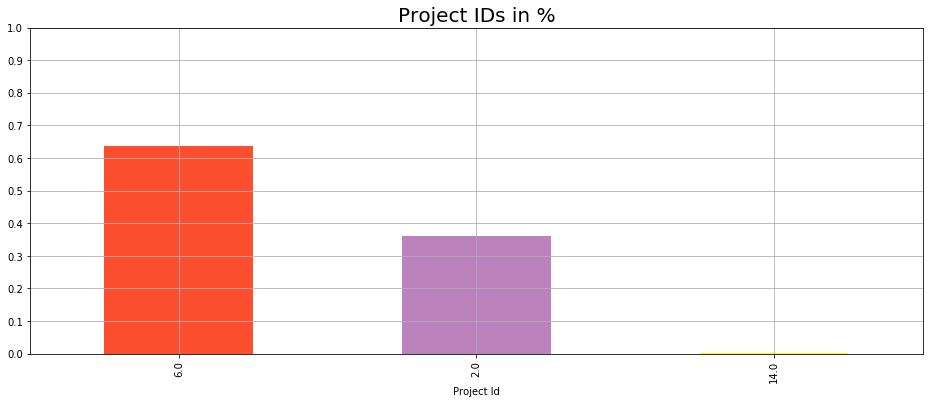

In [165]:
#Project Id and title
plt.figure(figsize=(16,6))
ax=cons['projectid'].value_counts(normalize=True).plot(kind='bar',color=['#fc4f30','#bc82bd','yellow','green','purple'])
plt.yticks(np.arange(0, 1.1, step=0.1))
ax.set_title("Project IDs in %",fontsize=20)
ax.set_xlabel("Project Id")
ax.grid()

Text(0, 0.5, 'count')

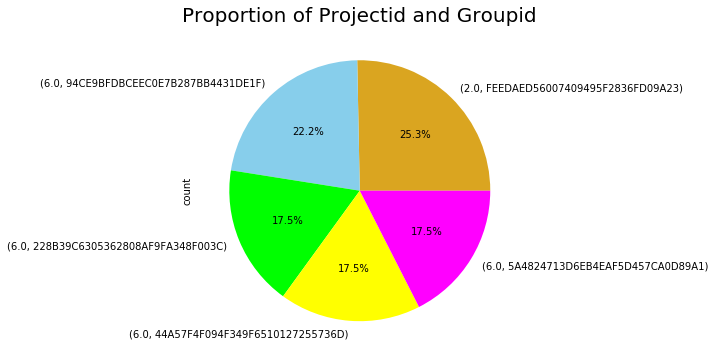

In [166]:
f, ax = plt.subplots(figsize=(16,6))
cons.groupby(['projectid','groupid']).size().nlargest().plot(kind='pie', colors=['goldenrod','skyblue','lime','yellow','magenta'],autopct='%1.1f%%')
plt.title('Proportion of Projectid and Groupid',fontsize=20)
plt.ylabel('count')

<b>Project id <b>6</b> comprises of around <b>63%</b> of projects followed by <b>36%</b> from Project id <b>2</b> and the rest by Project id <b>14.The Top 5 group ids with maximum count are as follows:
    1. FEEDAED56007409495F2836FD09A23 from Proj 2
    2. 94CE9BFDBCEEC0E7B287BB4431DE1F from Proj 6
    3. 228B39C6305362808AF9FA348F003C from Proj 6
    4. 44A57F4F094F349F6510127255736D from Proj 6
    5. 5A4824713D6EB4EAF5D457CA0D89A1 from Proj 6

<h2>Exploring different Titles </h2>

Text(0, 0.5, 'Count')

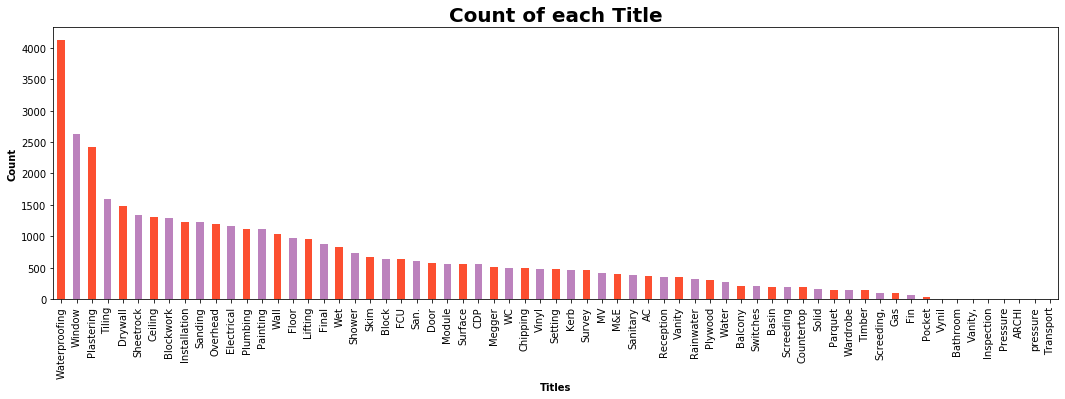

In [167]:
f, ax = plt.subplots(figsize=(18,5))
cons['title'].value_counts().plot(kind='bar',color=['#fc4f30','#bc82bd'])
plt.title('Count of each Title',weight='bold',fontsize=20)
ax.set_xlabel('Titles',weight='bold')
ax.set_ylabel('Count',weight='bold')


<b>'Waterproofing'</b> seems to have the highest count followedby <b>Window</b> and <b>Plastering</b>. On the other hand, <b>Transport,ARCHI,Pressure</b> have the lowest count.


<h2>Exploring Dates</h2>

In [168]:
#Creating a new variable called 'plan_diff' to get the difference in time between planend and planstart
cons['plan_diff']=cons['planend']-cons['planstart']
cons['plan_diff_day']=cons['plan_diff'].dt.days*24
cons['plan_diff_hrs']=cons['plan_diff'].dt.components['hours']
cons['new_plan_diff_hrs']=cons['plan_diff_day']+cons['plan_diff_hrs']
cons.head()

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,trackingend,milestoneid,createdby,deletedby,startedby,completedby,plan_diff,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs
0,2E5B227FB651EACE94EB9346105C69,2.0,AA6735140E8FE46BEA74054B34E153,56897.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,95D6AE9C11757AD4AE6D77396283D2,NaN,...,2019-08-27 13:00:00,NaN,28901888f98a3b4685f2d42a83aa19a72b063da6,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24
1,68AC6663FDE7C20EBC22598C0DC3FE,2.0,11B2FEF3016FDF2D603F75CA327D55,57064.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,B9AD71546EAF3C57743D4C59BC43B8,NaN,...,2019-08-14 18:00:00,NaN,8d5e69c044bb397eb17dc24f5ae9bf35a68b7054,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24
2,95D6AE9C11757AD4AE6D77396283D2,2.0,AA6735140E8FE46BEA74054B34E153,56896.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,7B8BE28699C29B5A4A9DA2BD1C11BD,NaN,...,2019-08-25 16:00:00,NaN,28901888f98a3b4685f2d42a83aa19a72b063da6,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 04:00:00,0,4,4
3,B9AD71546EAF3C57743D4C59BC43B8,2.0,11B2FEF3016FDF2D603F75CA327D55,57063.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,AF9960F394A91F94F6C8B95E5B5417,NaN,...,2019-08-13 18:00:00,NaN,8d5e69c044bb397eb17dc24f5ae9bf35a68b7054,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 04:00:00,0,4,4
4,7B8BE28699C29B5A4A9DA2BD1C11BD,2.0,AA6735140E8FE46BEA74054B34E153,56895.0,Module,2019-07-31 12:00:00,2019-07-31 14:00:00,0,71DDF615247248AF96FB29395F5824,NaN,...,2019-08-25 12:00:00,NaN,28901888f98a3b4685f2d42a83aa19a72b063da6,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 02:00:00,0,2,2


In [169]:
#Creating a new variable called 'tracking_diff' to get the difference in time between trackingend and trackingstart
cons['tracking_diff']=cons['trackingend']-cons['trackingstart']
cons['tracking_diff_day']=cons['tracking_diff'].dt.days*24
cons['tracking_diff_hours']=cons['tracking_diff'].dt.components['hours']
cons['new_tracking_diff_hrs']=cons['tracking_diff_day']+cons['tracking_diff_hours']
cons.head()

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,startedby,completedby,plan_diff,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs
0,2E5B227FB651EACE94EB9346105C69,2.0,AA6735140E8FE46BEA74054B34E153,56897.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,95D6AE9C11757AD4AE6D77396283D2,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24,1 days 00:00:00,24,0,24
1,68AC6663FDE7C20EBC22598C0DC3FE,2.0,11B2FEF3016FDF2D603F75CA327D55,57064.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,B9AD71546EAF3C57743D4C59BC43B8,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24,1 days 00:00:00,24,0,24
2,95D6AE9C11757AD4AE6D77396283D2,2.0,AA6735140E8FE46BEA74054B34E153,56896.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,7B8BE28699C29B5A4A9DA2BD1C11BD,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 04:00:00,0,4,4,0 days 04:00:00,0,4,4
3,B9AD71546EAF3C57743D4C59BC43B8,2.0,11B2FEF3016FDF2D603F75CA327D55,57063.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,AF9960F394A91F94F6C8B95E5B5417,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 04:00:00,0,4,4,0 days 04:00:00,0,4,4
4,7B8BE28699C29B5A4A9DA2BD1C11BD,2.0,AA6735140E8FE46BEA74054B34E153,56895.0,Module,2019-07-31 12:00:00,2019-07-31 14:00:00,0,71DDF615247248AF96FB29395F5824,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 02:00:00,0,2,2,0 days 02:00:00,0,2,2


In [236]:
cons['Time_diff']=cons['new_tracking_diff_hrs']-cons['new_plan_diff_hrs']
cons.head()

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration,Time
0,2E5B227FB651EACE94EB9346105C69,2.0,AA6735140E8FE46BEA74054B34E153,56897.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,95D6AE9C11757AD4AE6D77396283D2,NaN,...,24,0,24,1 days 00:00:00,24,0,24,0,25 days 19:00:00,Completed On Time
1,68AC6663FDE7C20EBC22598C0DC3FE,2.0,11B2FEF3016FDF2D603F75CA327D55,57064.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,B9AD71546EAF3C57743D4C59BC43B8,NaN,...,24,0,24,1 days 00:00:00,24,0,24,0,13 days 00:00:00,Completed On Time
2,95D6AE9C11757AD4AE6D77396283D2,2.0,AA6735140E8FE46BEA74054B34E153,56896.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,7B8BE28699C29B5A4A9DA2BD1C11BD,NaN,...,0,4,4,0 days 04:00:00,0,4,4,0,24 days 22:00:00,Completed On Time
3,B9AD71546EAF3C57743D4C59BC43B8,2.0,11B2FEF3016FDF2D603F75CA327D55,57063.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,AF9960F394A91F94F6C8B95E5B5417,NaN,...,0,4,4,0 days 04:00:00,0,4,4,0,13 days 00:00:00,Completed On Time
4,7B8BE28699C29B5A4A9DA2BD1C11BD,2.0,AA6735140E8FE46BEA74054B34E153,56895.0,Module,2019-07-31 12:00:00,2019-07-31 14:00:00,0,71DDF615247248AF96FB29395F5824,NaN,...,0,2,2,0 days 02:00:00,0,2,2,0,24 days 22:00:00,Completed On Time


In [237]:
#Checking those rows wher Time_diff <0
cons[cons['Time_diff']<0]

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration,Time
2164,265DA1EBE22438801F650B7F8FE518,6.0,C03E46E8BF489BE5C939A89AAC91D2,1705.0,Wall,2018-11-16 08:00:00,2018-11-16 10:00:00,2,4AC01C7A0309658306B594919AC741,NaN,...,0,2,2,00:00:00,0,0,0,-2,42 days 21:18:00,Completed On Time
29013,E4FC907FB868909BC54D554AC0F00,6.0,A7F83D408522FB7EBA599FE4FB5B4D,40663.0,Survey,2019-06-12 12:00:00,2019-06-12 14:00:00,0,A9CE2DE3015721416A80DF77247265|812467CC35AB0DB...,NaN,...,0,2,2,01:00:00,0,1,1,-1,59 days 16:00:00,Completed On Time
41833,C53CAA08381787C3AE8F61E2F1974D,2.0,2AF15AF97D8A140E5787DBF119935B,14834.0,Lifting,2019-03-13 05:00:00,2019-03-13 09:00:00,2,105A170F035B4A22B868704DA2EC90,NaN,...,0,4,4,00:00:00,0,0,0,-4,-2 days +01:13:00,Completed On Time
41898,E7249D0C47410CC0E395B01991C9E4,2.0,AF4FDE8E3D7B35F6B1DD2DE5FC38F1,13987.0,Lifting,2019-03-10 03:00:00,2019-03-10 07:00:00,2,90F958C3E38433B27A8F3EBE51038C,NaN,...,0,4,4,00:00:00,0,0,0,-4,-3 days +23:29:00,Completed On Time
42080,2024A9EF1C04C1EB71804EAA9AA065,2.0,4490233AE2E54EF9051CF9D39AB27D,12346.0,Lifting,2019-03-04 01:00:00,2019-03-04 05:00:00,2,F3BBC0512ECC2D7E00E799078485DB,NaN,...,0,4,4,00:00:00,0,0,0,-4,7 days 05:16:00,Completed On Time
42092,93A3BCF14D92A33218AD66FAB171DE,2.0,6882572E0A68D6DA1552AF5D9F39AD,12020.0,Lifting,2019-02-28 09:00:00,2019-03-01 03:00:00,2,6AA94B28C08134ADE1F3373CF2C1A7,NaN,...,0,18,18,00:00:00,0,0,0,-18,7 days 21:39:00,Completed On Time
42099,CC76D80B91DE39C096F28312E9A52D,2.0,84BFCBB77F7BD4EDCC79FFFD84E31A,11338.0,Lifting,2019-02-27 01:00:00,2019-02-27 05:00:00,2,EA24125C60919942B3C1A40682D1CB,NaN,...,0,4,4,00:00:00,0,0,0,-4,16 days 00:14:00,Completed On Time
42100,20C0424F519EBE73D5DCA47C46C9EB,2.0,9947A99A5EFC62EBFDEF82F9831445,11423.0,Lifting,2019-02-26 09:00:00,2019-02-27 03:00:00,2,35569494FB53BA3C6B1A7BD91FCF29,NaN,...,0,18,18,00:00:00,0,0,0,-18,13 days 00:22:00,Completed On Time
42104,7DEA09E8DE0CDD647B3E3AE99BF9C8,2.0,99D619BE57B8F9A9A4ED9A6B1F63D1,11514.0,Lifting,2019-02-25 07:00:00,2019-02-26 01:00:00,2,4898C0254482470EC02BEF89718BDC,NaN,...,0,18,18,00:00:00,0,0,0,-18,12 days 00:39:00,Completed On Time
42105,02411271AE87BE23D952491D15B019,2.0,C3750BB6F983B1A4BE7EBDC5E8F5AB,11605.0,Lifting,2019-02-25 07:00:00,2019-02-26 01:00:00,2,9771D1626F109FDA979DAE530F4E7D,NaN,...,0,18,18,00:00:00,0,0,0,-18,13 days 23:18:00,Completed On Time


<b>The Time difference being negative doesn't make sense since it means the tracking start time and  tracking end time was started and ended at the same time. Hence, we get time_diff in negative. Such data should be investigated.

In [171]:
#Checking if Plan start date and tracking start date are similar.
cons.loc[cons.trackingstart>cons.planstart]

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,completedby,plan_diff,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff
0,2E5B227FB651EACE94EB9346105C69,2.0,AA6735140E8FE46BEA74054B34E153,56897.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,95D6AE9C11757AD4AE6D77396283D2,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24,1 days 00:00:00,24,0,24,0
1,68AC6663FDE7C20EBC22598C0DC3FE,2.0,11B2FEF3016FDF2D603F75CA327D55,57064.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,B9AD71546EAF3C57743D4C59BC43B8,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24,1 days 00:00:00,24,0,24,0
2,95D6AE9C11757AD4AE6D77396283D2,2.0,AA6735140E8FE46BEA74054B34E153,56896.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,7B8BE28699C29B5A4A9DA2BD1C11BD,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 04:00:00,0,4,4,0 days 04:00:00,0,4,4,0
3,B9AD71546EAF3C57743D4C59BC43B8,2.0,11B2FEF3016FDF2D603F75CA327D55,57063.0,Lifting,2019-07-31 14:00:00,2019-07-31 18:00:00,0,AF9960F394A91F94F6C8B95E5B5417,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 04:00:00,0,4,4,0 days 04:00:00,0,4,4,0
4,7B8BE28699C29B5A4A9DA2BD1C11BD,2.0,AA6735140E8FE46BEA74054B34E153,56895.0,Module,2019-07-31 12:00:00,2019-07-31 14:00:00,0,71DDF615247248AF96FB29395F5824,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 02:00:00,0,2,2,0 days 02:00:00,0,2,2,0
5,AF9960F394A91F94F6C8B95E5B5417,2.0,11B2FEF3016FDF2D603F75CA327D55,57062.0,Module,2019-07-31 12:00:00,2019-07-31 14:00:00,0,AFB356945EB0912C856CEBC04AABC1,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 02:00:00,0,2,2,0 days 02:00:00,0,2,2,0
6,71DDF615247248AF96FB29395F5824,2.0,AA6735140E8FE46BEA74054B34E153,56894.0,Final,2019-07-31 11:00:00,2019-07-31 12:00:00,0,462AB62842E3F4D99986AD8AB4ADE2,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 01:00:00,0,1,1,0 days 01:00:00,0,1,1,0
7,AFB356945EB0912C856CEBC04AABC1,2.0,11B2FEF3016FDF2D603F75CA327D55,57061.0,Final,2019-07-31 11:00:00,2019-07-31 12:00:00,0,1795315615BD50E74A0273884CA66B,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,0 days 01:00:00,0,1,1,0 days 01:00:00,0,1,1,0
8,55B9CEC38DCD30115E65C73B1DA67E,2.0,169315B2948541AB85C71BAB3F01AB,56299.0,Installation,2019-07-31 06:00:00,2019-08-01 06:00:00,0,22499C794BDC64BB4E133A2A898583,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24,1 days 00:00:00,24,0,24,0
9,D2E6AE96F0EF0DE3B4BB112304FF9F,2.0,45793289429464F694C13089F66B62,56978.0,Installation,2019-07-31 06:00:00,2019-08-01 06:00:00,0,268A697FFB9BB36CA9B69007668717,NaN,...,11e623a37e87cf7995c466723ec99688d55cae8c,1 days 00:00:00,24,0,24,1 days 00:00:00,24,0,24,0


Around 41805 rows found where the schedule didn't go as planned.


In [172]:
#Adding a new columnn to get the time duration between tracking start and plan start
cons['Difference_duration']=cons.trackingstart-cons.planstart
cons.head(2)

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration
0,2E5B227FB651EACE94EB9346105C69,2.0,AA6735140E8FE46BEA74054B34E153,56897.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,95D6AE9C11757AD4AE6D77396283D2,NaN,...,1 days,24,0,24,1 days,24,0,24,0,25 days 19:00:00
1,68AC6663FDE7C20EBC22598C0DC3FE,2.0,11B2FEF3016FDF2D603F75CA327D55,57064.0,Installation,2019-07-31 18:00:00,2019-08-01 18:00:00,0,B9AD71546EAF3C57743D4C59BC43B8,NaN,...,1 days,24,0,24,1 days,24,0,24,0,13 days 00:00:00


In [174]:
#Checking to see if there are any dates where the project has been completed less than 0 days or more than the planned?
(cons[cons['Time_diff']!=0]).index

Int64Index([ 2164, 29013, 41833, 41898, 42080, 42092, 42099, 42100, 42104,
            42105,
            ...
            42465, 42466, 42467, 42468, 42469, 42470, 42471, 42472, 42473,
            42474],
           dtype='int64', length=182)

In [175]:
#Adding a new column and naming it as 'Time' to differentiate between tasks completed and delayed
cons.loc[cons['Time_diff']<=0,'Time']='Completed On Time'
cons.loc[cons['Time_diff']>0 ,'Time']='Delayed'

cons.tail()

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration,Time
42470,7A19C81A203A16FE0B1D007FC2814B,6.0,C03E46E8BF489BE5C939A89AAC91D2,1659.0,Kerb,2018-11-16 08:00:00,2018-11-17 01:00:00,2,4AC01C7A0309658306B594919AC741,NaN,...,0,17,17,00:01:00,0,0,0,-17,12 days 22:35:00,Completed On Time
42471,659C0EB49CA5AC9EB9F8A313B81626,6.0,C03E46E8BF489BE5C939A89AAC91D2,1663.0,Rainwater,2018-11-16 07:00:00,2018-11-16 09:00:00,2,B380C592B6C34D0D961EC7F09F7333,NaN,...,0,2,2,00:00:00,0,0,0,-2,42 days 22:15:00,Completed On Time
42472,4AC01C7A0309658306B594919AC741,6.0,C03E46E8BF489BE5C939A89AAC91D2,1658.0,Survey,2018-11-16 07:00:00,2018-11-16 08:00:00,2,B380C592B6C34D0D961EC7F09F7333,NaN,...,0,1,1,00:00:00,0,0,0,-1,12 days 23:35:00,Completed On Time
42473,B380C592B6C34D0D961EC7F09F7333,6.0,C03E46E8BF489BE5C939A89AAC91D2,1657.0,Setting,2018-11-16 03:00:00,2018-11-16 07:00:00,2,D2FF31A78548FD18289156132BF8CF,NaN,...,0,4,4,00:00:00,0,0,0,-4,13 days 03:33:00,Completed On Time
42474,2260557AE137D649F7D677A6B6BB89,6.0,C03E46E8BF489BE5C939A89AAC91D2,1656.0,Chipping,2018-11-16 03:00:00,2018-11-17 01:00:00,2,D2FF31A78548FD18289156132BF8CF,NaN,...,0,22,22,00:00:00,0,0,0,-22,13 days 03:33:00,Completed On Time


In [176]:
#Writing this cleaned csv file for visualizing on sisense tool
#cons.to_csv ('construction.csv')

<h3>Checking if the projects started on time as planned.

In [177]:
#Checking if the tracking started greater than a month
a=(cons.Difference_duration>'30 days').value_counts()

Text(0.5, 1.0, 'Projects started 30 days after Planned date')

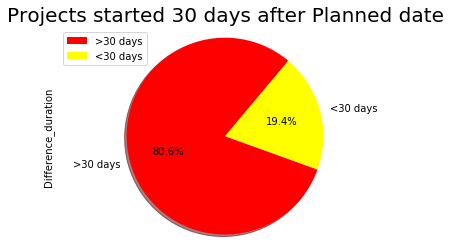

In [178]:
#Fetching such rows
labels=['>30 days','<30 days']
a.plot(kind='pie',colors=['red','yellow'],autopct='%1.1f%%',labels=labels,
        shadow=True, startangle=50)
plt.legend()
plt.axis('equal')
plt.title('Projects started 30 days after Planned date',fontsize=20)

Almost 81% of projects didn't start as per planned date.

In [179]:
late_start=cons.loc[cons.Difference_duration>'30 days']
late_start

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration,Time
195,F465ECAC085731D989CB2EB2C55EB4,6.0,5A4824713D6EB4EAF5D457CA0D89A1,55504.0,FCU,2019-07-27 07:30:00,2019-07-27 09:30:00,0,97C73B635B8E05E028BD5A7BC1554C|C5FFB80071BE165...,NaN,...,0,2,2,0 days 02:00:00,0,2,2,0,30 days 05:30:00,Completed On Time
215,9BFBB4B8BBB35B2BEAB3F8AEA8AB52,6.0,A56CA1161924CB2746519B0ADAE05C,55907.0,FCU,2019-07-27 05:30:00,2019-07-27 07:30:00,0,6E923285B9950C75F3A13CD4E073EE|0BB1C3F2BB54881...,NaN,...,0,2,2,0 days 02:00:00,0,2,2,0,30 days 07:30:00,Completed On Time
224,E98E6FB6B1A55332E3AF421CA22256,2.0,AA6735140E8FE46BEA74054B34E153,56912.0,FCU,2019-07-27 04:00:00,2019-07-27 06:00:00,0,CF5CA10E20257D3364AF93485309C6,NaN,...,0,2,2,0 days 02:00:00,0,2,2,0,32 days 04:00:00,Completed On Time
225,8F8A2699C6CE38C77D0D3021ADB500,2.0,AA6735140E8FE46BEA74054B34E153,56916.0,MV,2019-07-27 04:00:00,2019-07-27 05:00:00,0,CF5CA10E20257D3364AF93485309C6,NaN,...,0,1,1,0 days 01:00:00,0,1,1,0,32 days 07:00:00,Completed On Time
259,5E99362B04D2922EECA14CEF46E218,6.0,5A4824713D6EB4EAF5D457CA0D89A1,55503.0,FCU,2019-07-26 23:30:00,2019-07-27 00:30:00,0,71FCC53F6801A361A943531D8EB5BE,NaN,...,0,1,1,0 days 01:00:00,0,1,1,0,30 days 12:30:00,Completed On Time
283,2010CDB8E9CA126956399E1D261403,6.0,A56CA1161924CB2746519B0ADAE05C,55906.0,FCU,2019-07-26 21:30:00,2019-07-26 22:30:00,0,FBEF508782DEF597DDAA64FEA68ABD,NaN,...,0,1,1,0 days 01:00:00,0,1,1,0,30 days 14:30:00,Completed On Time
292,747F5D80D23AB7B830F8CD872F995B,6.0,5A4824713D6EB4EAF5D457CA0D89A1,55501.0,Shower,2019-07-26 18:30:00,2019-07-26 21:30:00,0,EB652CFA6C31E78D19361A1CABB7C1,NaN,...,0,3,3,0 days 03:00:00,0,3,3,0,30 days 11:30:00,Completed On Time
304,2648F0F468CCAC0C6B69EABD05C31B,6.0,A56CA1161924CB2746519B0ADAE05C,55904.0,Shower,2019-07-26 16:30:00,2019-07-26 19:30:00,0,7985365554709933A9183464F91ADA,NaN,...,0,3,3,0 days 03:00:00,0,3,3,0,30 days 13:30:00,Completed On Time
307,4B0170CB50FC60D12090E79E80DA98,2.0,169315B2948541AB85C71BAB3F01AB,56315.0,FCU,2019-07-26 16:00:00,2019-07-26 18:00:00,0,AFC37047177C4BC3B42EF547C41EBA,NaN,...,0,2,2,0 days 02:00:00,0,2,2,0,32 days 20:00:00,Completed On Time
419,73882F59C1F77A986B8009C3DE0DA1,2.0,AA6735140E8FE46BEA74054B34E153,56911.0,AC,2019-07-26 01:00:00,2019-07-26 05:00:00,0,C46B59D9E67185C88363936D1F1630,NaN,...,0,4,4,0 days 04:00:00,0,4,4,0,33 days 03:00:00,Completed On Time


Around 33742 rows found where the projects started 30 days later than planned dates

Text(0, 0.5, 'Count of each Project ')

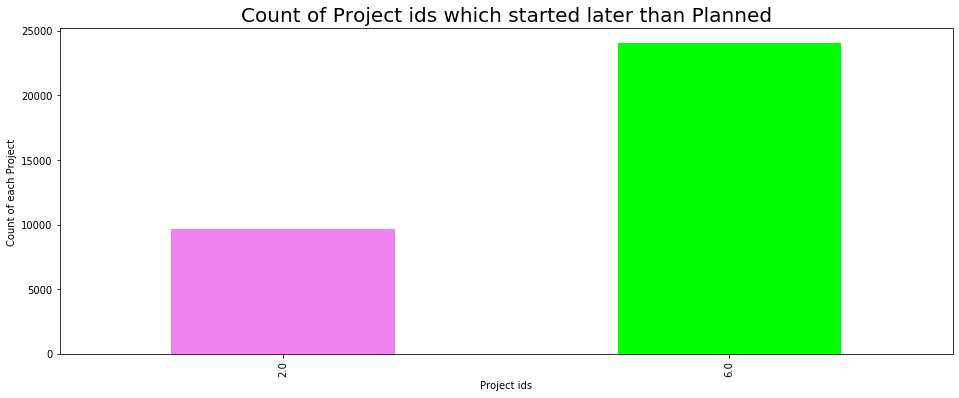

In [180]:
f, ax = plt.subplots(figsize=(16,6))
late_start.groupby(['projectid']).size().plot(kind='bar', color=['violet','lime'])
plt.title('Count of Project ids which started later than Planned',fontsize=20)
plt.xlabel('Project ids')
plt.ylabel('Count of each Project ')

Majority of projects with Project ID 6 started later than planned.

<h3>Exploring Titles which started later than 30 days


In [232]:
#Since Project 6 contributes to majority of late starts, identifying Proj 6's oldest start date which lead to the delay of the rest
late_start[late_start.projectid==6].groupby(['trackingstart']).size().nsmallest()



trackingstart
2018-12-29 05:22:00    1
2018-12-29 05:24:00    1
2018-12-29 05:26:00    1
2018-12-29 05:32:00    1
2018-12-31 02:32:00    1
dtype: int64

In [235]:
#Fetching that record which with tracking start =2018-12-19

late_start.loc[late_start.trackingstart=='2018-12-29 05:22:00']

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration,Time
42442,75E78D075D78E9184A86EED32C0BFC,6.0,C03E46E8BF489BE5C939A89AAC91D2,1707.0,Plastering,2018-11-17 08:00:00,2018-11-17 10:00:00,2,06B729B3DF7316316A607789037D0A,NaN,...,0,2,2,0 days,0,0,0,-2,41 days 21:22:00,Completed On Time


<b>'Plastering' is the title which actually started a month later than scheduled planned start date. This could be because there were no resources or raw materials required to do this activity. The details of the root cause need to be looked into. Since, the rest of the processes operate sequence, the entire project as a whole got delayed.

In [233]:
#Similary checking the oldest tracking start date for Project 2
late_start[late_start.projectid==2].groupby(['trackingstart']).size().nsmallest()

trackingstart
2019-03-04 00:38:00    1
2019-03-04 00:48:00    1
2019-03-04 10:06:00    1
2019-03-09 07:36:00    1
2019-03-10 03:32:00    1
dtype: int64

In [234]:
late_start.loc[late_start.trackingstart=='2019-03-04 00:38:00']

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration,Time
42201,AAA771DF909C50C96F91C2B94D8D33,2.0,0C9DB024C9C38CC8D6EA350C6CB6AD,8245.0,Lifting,2019-01-31 01:00:00,2019-01-31 05:00:00,2,EE9C08F7D23327AB3C0D112830C595,NaN,...,0,4,4,0 days,0,0,0,-4,31 days 23:38:00,Completed On Time


<b>'Lifting' is the title which actually started on March 4 as opposed to it's plan which is 31st Jan,2019.

Now, we know that the projects started late but let us check if there were delays in completion of projecs

In [183]:
#Checking Delays and Completed on Time count
cons['Time'].value_counts()

Completed On Time    41816
Delayed                 50
Name: Time, dtype: int64

Text(0.5, 1.0, 'Delayed vs On Time')

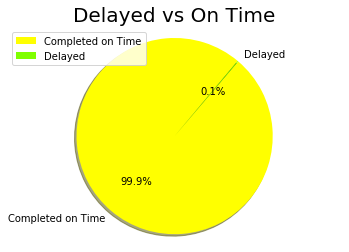

In [184]:
#Visualizing the proportion
a=cons['Time'].value_counts()
sizes=[41816,50]
labels=['Completed on Time','Delayed']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,colors=['yellow','chartreuse'],labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=50)
plt.legend()
plt.axis('equal')
plt.title('Delayed vs On Time',fontsize=20)


<b>Almost every work is going on Time except 50 records.</b>

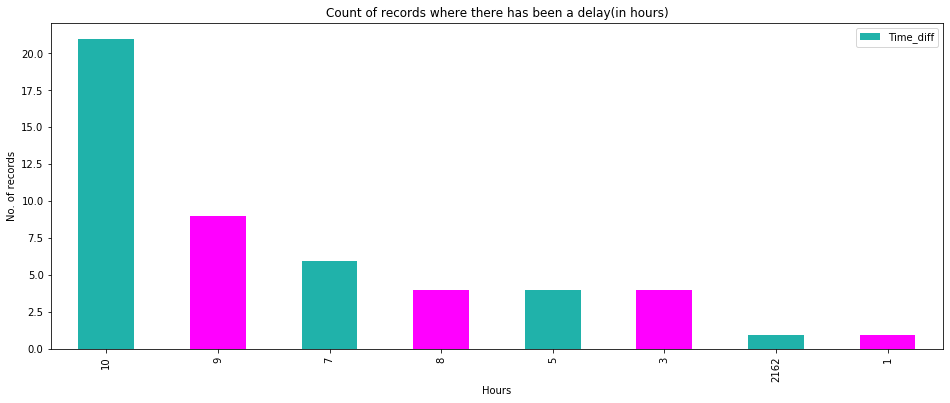

In [185]:
#Fetching data where Time_diff>0
plot_graph=cons[cons['Time_diff']> 0]
plot_graph
#Plotting a bar graph of those 50 records only
f, ax = plt.subplots(figsize=(16,6))
plot_graph['Time_diff'].value_counts().plot(kind='bar',color=['lightseagreen','magenta'])
plt.title("Count of records where there has been a delay(in hours)")
plt.xlabel("Hours")
plt.ylabel("No. of records")
plt.legend()


Text(0, 0.5, 'Count of each title ')

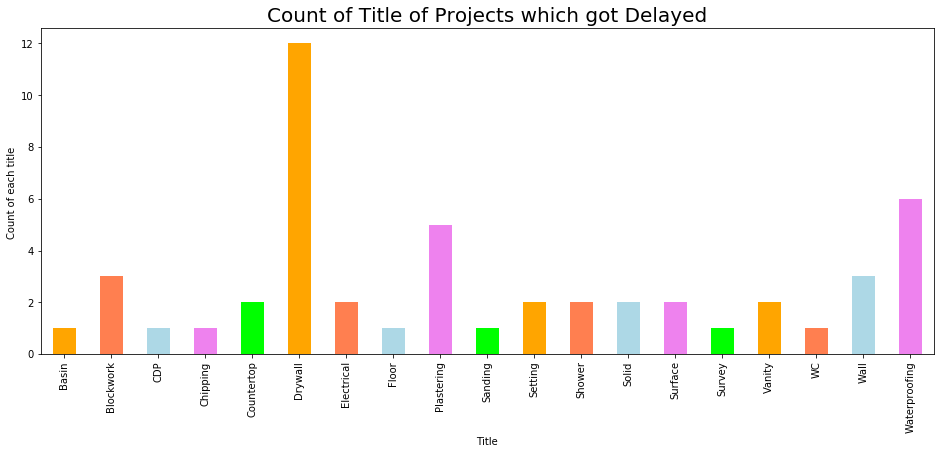

In [186]:
#Plotting graph for titles which got delayed
f, ax = plt.subplots(figsize=(16,6))
plot_graph.groupby(['title']).size().plot(kind='bar', color=['orange','coral','lightblue','violet','lime'])
plt.title('Count of Title of Projects which got Delayed',fontsize=20)
plt.xlabel('Title')
plt.ylabel('Count of each title ')

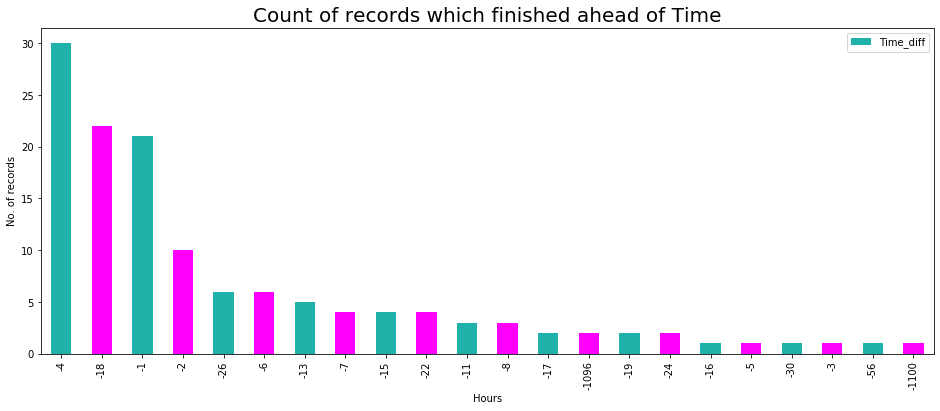

In [187]:
#Plotting graph for those records which finished ahead of time
plot_graph1=cons[cons['Time_diff']< 0]
f, ax = plt.subplots(figsize=(16,6))
plot_graph1['Time_diff'].value_counts().plot(kind='bar', color=['lightseagreen','magenta'])
plt.title("Count of records which finished ahead of Time",fontsize=20)
plt.xlabel("Hours")
plt.ylabel("No. of records")
plt.legend()


Text(0, 0.5, 'Count of each title ')

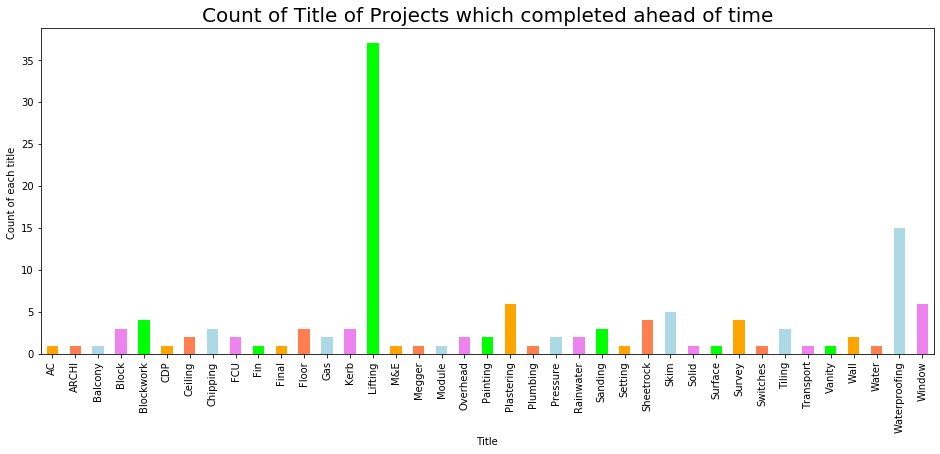

In [188]:
f, ax = plt.subplots(figsize=(16,6))
plot_graph1.groupby(['title']).size().plot(kind='bar', color=['orange','coral','lightblue','violet','lime'])
plt.title('Count of Title of Projects which completed ahead of time',fontsize=20)
plt.xlabel('Title')
plt.ylabel('Count of each title ')

<b>1.Around 21 records have been found where there has been a delay by 10 hours followed by 8 records where the delay is 9 hours. There is one exceptional record where the delay has been by 2162 hours which is 90 days. 
<br>2.Title 'Lifting' has the maximum count for completing ahead of time followed by Waterproofing.Hence, we could either reduce the planned time for this title and add it to the titles which contribute to most delays for project completion on time.
<br>3. Title 'Drywall' contributes to maximum delays followed by 'Waterproofing' and 'Plastering'.
<br>4. When it comes to overall planning, there is room for reducing plan time specially for the lifting activities in order to compensate for delays on other titles.   

<h3>Exploring Status with Delays</h3>

Text(0.5, 1.0, 'No. of  tasks delayed by status')

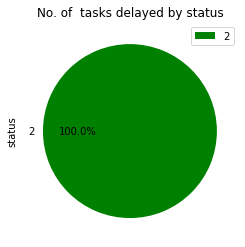

In [189]:
#Creating a masked dataframe only for those 51 records to explore further
df_delayed=cons[cons['Time_diff']> 0]
df_completed=cons[cons['Time_diff']<=0]

#Checking status with respect to delays
df_delayed['status'].value_counts()
color=['green','pink','blue']
df_delayed['status'].value_counts().plot.pie(subplots=True,autopct='%1.1f%%',legend=True,colors=color)
plt.title('No. of  tasks delayed by status')

Text(0, 0.5, 'number of delayed projects')

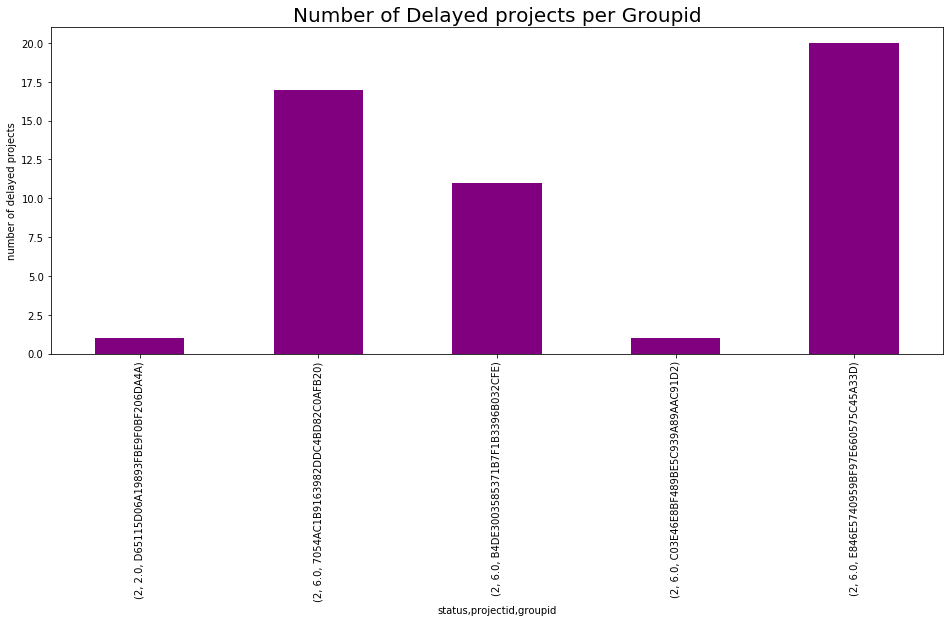

In [190]:
#Inferring stats on delayed projects grouped by project id
f, ax = plt.subplots(figsize=(16,6))
df_delayed.groupby(['status','projectid','groupid']).size().plot(kind='bar', color=['purple'])
plt.title('Number of Delayed projects per Groupid',fontsize=20)
plt.ylabel('number of delayed projects')

<b>1.We see that all the 50 records under 'Delayed' category come under Status number 2 .<br>
2.Under 'Completed on Time' category, around 74% of the tasks come under Status 0.<br>
3.Nothing much can be inferred using this variable.


<h3>Exploring Teamids</h3>

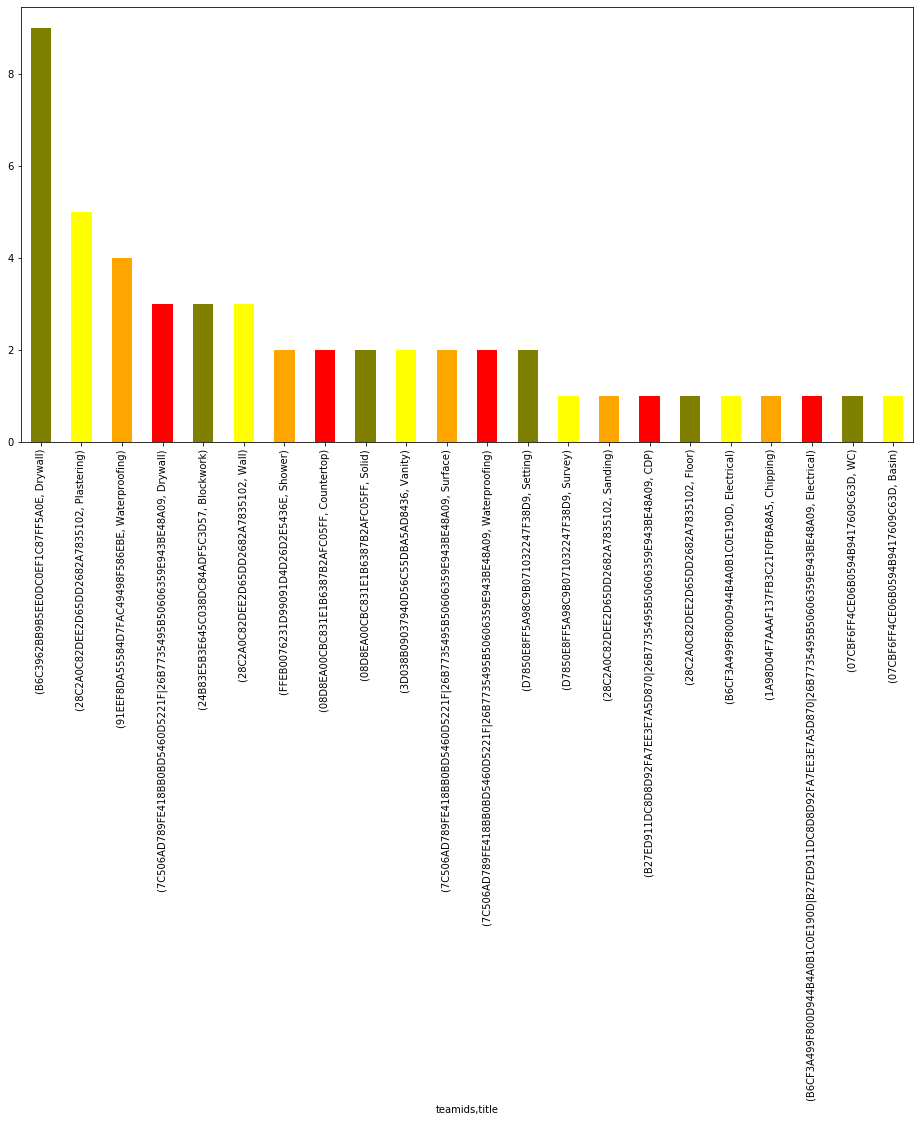

In [191]:
#Plotting TeamIds delayed by titles
f, ax = plt.subplots(figsize=(16,8))
df_delayed.groupby(['teamids','title']).size().sort_values(ascending=False).plot(kind='bar',color=['olive','yellow','orange','red'])


<b>Team Ids: B6C3962BB9B5EE0DC0EF1C87FF5A0E,28C2A0C82DEE2D65DD2682A7835102,91EEF8DA55584D7FAC49498F586EBE take the most time delaying the process.They should be monitored.

<h3>Exploring Delays with respect to group id, project id and Titles

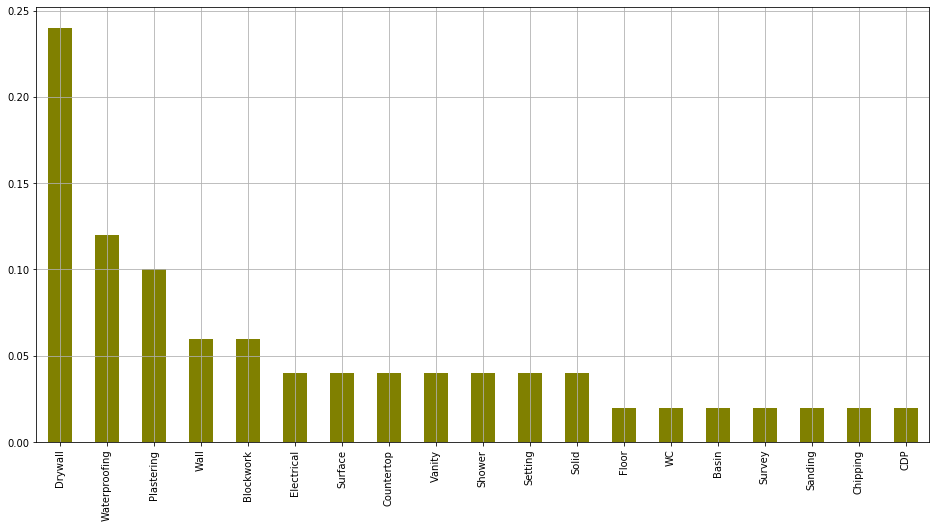

In [192]:
#Delays with titles
f, ax = plt.subplots(figsize=(16,8))
df_delayed['title'].value_counts(normalize=True).plot(kind='bar',color='olive')
ax.grid()

About 24% of tasks delayed come from 'Drywall' title,followed by 'Waterproofing' at  11% which is followed by 'Plastering at 9%'

Text(0, 0.5, 'Count')

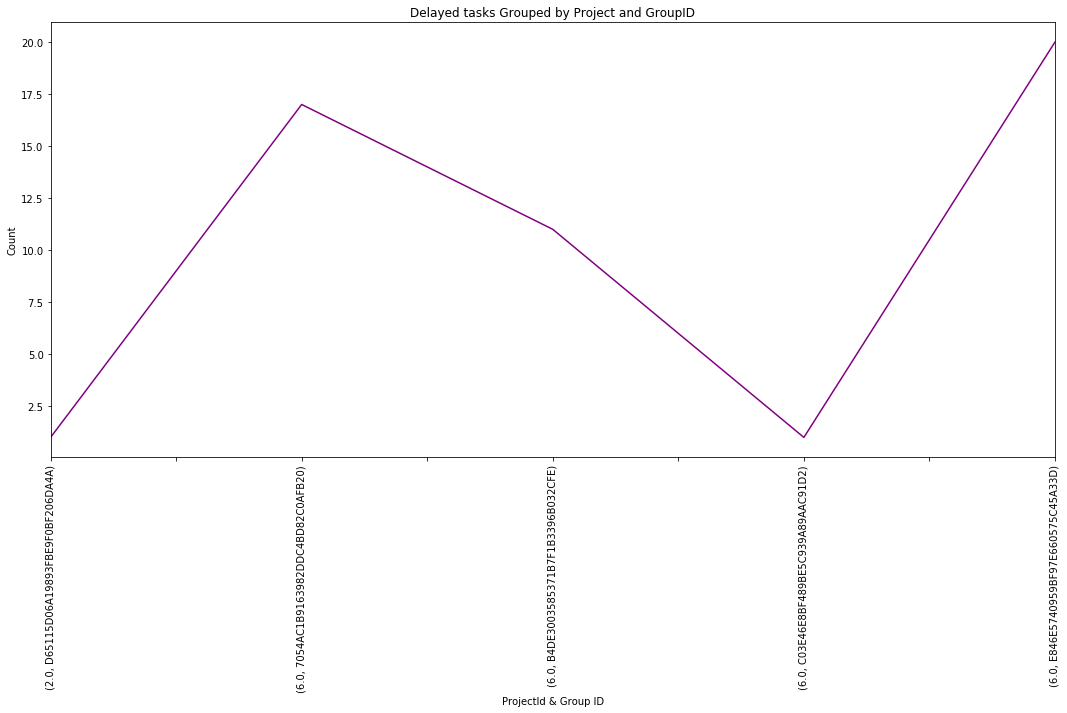

In [193]:
#Plotting delays wrt project and group id
plt.figure(figsize=(18,8))
df_delayed.groupby(['projectid','groupid']).size().plot(kind='line', color=['purple'])
plt.xticks(  rotation='vertical')
plt.title('Delayed tasks Grouped by Project and GroupID')
plt.xlabel('ProjectId & Group ID')
plt.ylabel('Count')

Around 99% of the delayed tasks come from Project Id 6 with around 20 coming from group ids E846E5740959BF97E660575C45A33D, 17 from 7054AC1B9163982DDC4BD82C0AFB20 and 11 from B4DE3003585371B7F1B3396B032CFE. 

In [194]:
#Creating masks for Project 6 since it has around 50 records in Delayed category
proj6=df_delayed[df_delayed['projectid']==6]


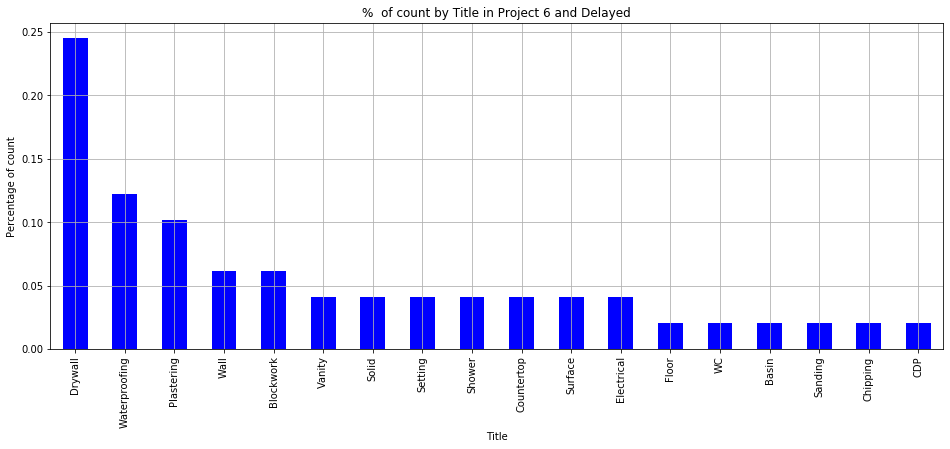

In [195]:
#Visualizing titles for project 6 which have been delayed
plt.figure(figsize=(16,6))
#fnc = lambda x: x.value_counts().head(2)
proj6['title'].value_counts(normalize=True).nlargest(20).plot(kind='bar',color='b')
plt.xlabel('Title')
plt.ylabel('Percentage of count')
plt.title('%  of count by Title in Project 6 and Delayed')
plt.grid()

Text(0.5, 1.0, 'Time assigned for each title')

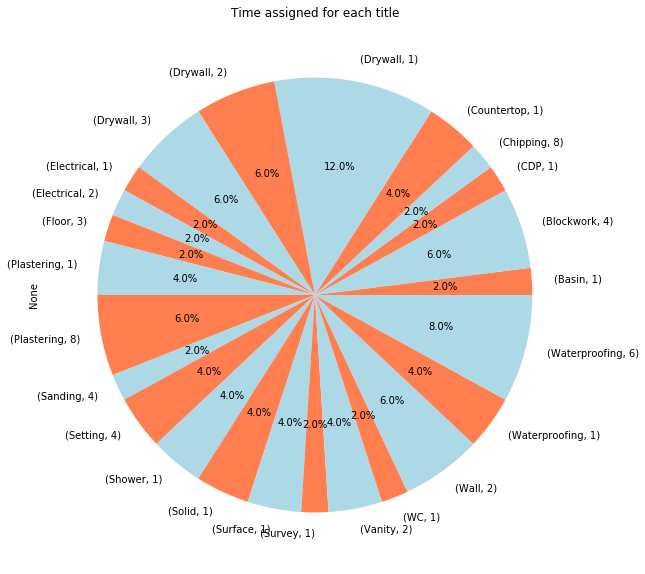

In [196]:
#Check the number of hours assigned to each title
df_delayed.groupby(['title','new_plan_diff_hrs']).size().plot(kind='pie',autopct='%1.1f%%',colors=['coral','lightblue'],figsize=(10,10))
plt.title("Time assigned for each title")


<b>1.'Drywall'contributes to maximum delays followed by 'Waterproofing'.These tasks have been given around 1,2,3 hour for Drywall and 6 and 1hours of time respectively.To reduce delays in the future, planned time should be increased for these titles or if there are no constraint on budget, more people can be recruited or money should be spent on equipments for quickening the process<br>

2.Group ids under project id 6 :E846E5740959BF97E660575C45A33D, 7054AC1B9163982DDC4BD82C0AFB20 andB4DE3003585371B7F1B3396B032CFE contribute to most delays. They should be watched closely. 

<h3> Exploring Started by and Ended by columns</h3>

In [197]:
#Let us now check if the person who started a task completed it or was it someone else who finished it?
(cons['startedby']==cons['completedby']).value_counts()

True     41539
False      327
dtype: int64

In [198]:
#Check those rows where the task was started by one person but finished by another
diff_people=cons.loc[(cons['startedby']!= cons['completedby'])]
diff_people

,id,projectid,groupid,name,title,planstart,planend,status,previousids,templateids,...,plan_diff_day,plan_diff_hrs,new_plan_diff_hrs,tracking_diff,tracking_diff_day,tracking_diff_hours,new_tracking_diff_hrs,Time_diff,Difference_duration,Time
278,47933827114D08C8E5C7F14EF4539C,2.0,45793289429464F694C13089F66B62,56934.0,Plumbing,2019-07-26 22:00:00,2019-07-26 23:00:00,2,9489A65DA379DE3220995C904E4159,01557519E672049070D0DD36DA8383,...,0,1,1,0 days 01:00:00,0,1,1,0,5 days 11:00:00,Completed On Time
296,B97EC080DB2CC1DB614421EB010CA0,2.0,3A1E3EAE1BC7868D19F5A8C8BDDF22,56252.0,Waterproofing,2019-07-26 17:00:00,2019-07-26 18:00:00,2,BFD93DF6B68A8E024595F6CADE124E,F89DD3D1B3A5D44936522BCB99DD0E,...,0,1,1,0 days 01:00:00,0,1,1,0,5 days 16:17:00,Completed On Time
309,F62D06F25AE308F28A473A2AEC845A,6.0,C46DBD137EE81286C3417F29D9802A,56676.0,Tiling,2019-07-26 15:00:00,2019-07-27 07:00:00,2,ACD146698F580AC102587218023F84,NaN,...,0,16,16,0 days 16:00:00,0,16,16,0,6 days 11:26:00,Completed On Time
477,BD8D6F4C00C5796A98F252DF9030E0,2.0,11B2FEF3016FDF2D603F75CA327D55,57072.0,Overhead,2019-07-25 19:00:00,2019-07-25 20:00:00,2,4EB705836E228BA640282A33D03272,01557519E672049070D0DD36DA8383,...,0,1,1,0 days 01:00:00,0,1,1,0,5 days 10:20:00,Completed On Time
624,B191D549FB2E18CBDE7CEA0B29BA1E,2.0,45793289429464F694C13089F66B62,56924.0,San.,2019-07-25 08:00:00,2019-07-25 09:00:00,2,288C3961229DA57A109AD3054E1D31,9A3DD028082C15A2606617C42E2BA3,...,0,1,1,0 days 01:00:00,0,1,1,0,6 days 03:00:00,Completed On Time
671,608DB070677C5B08FDB544BD90D640,2.0,169315B2948541AB85C71BAB3F01AB,56239.0,Electrical,2019-07-25 05:00:00,2019-07-25 06:00:00,2,FB783503411377C8B57D8094F56300,9B138EA09EFF8A92E78F44B3B0E302,...,0,1,1,0 days 01:00:00,0,1,1,0,7 days 23:32:00,Completed On Time
695,DC566DB0C8F46317167974A569504F,2.0,169315B2948541AB85C71BAB3F01AB,56311.0,Electrical,2019-07-25 03:00:00,2019-07-25 04:00:00,2,7E7A5EFF17506C9F6EA06426343138,9B138EA09EFF8A92E78F44B3B0E302,...,0,1,1,0 days 01:00:00,0,1,1,0,7 days 23:32:00,Completed On Time
750,4DF1D5C85754B3768EBF467DD54AAF,6.0,C4B42A628EC40CD0D36E20DEB48163,56590.0,Sanding,2019-07-24 23:00:00,2019-07-25 03:00:00,1,3383D75A7043E9983E145ED42ECA2F,NaN,...,0,4,4,0 days 04:00:00,0,4,4,0,14 days 14:00:00,Completed On Time
754,E8D8DE6591A1A3F76836CBAC3B3187,2.0,169315B2948541AB85C71BAB3F01AB,56282.0,Megger,2019-07-24 23:00:00,2019-07-25 00:00:00,2,73DE91BD7D2FDAC83C52713DBEF154,C6606BCF5E64D45CD57A6EB95A4767,...,0,1,1,0 days 01:00:00,0,1,1,0,8 days 03:32:00,Completed On Time
811,E7D62A3F8229BCC12F85876BAB5CFF,2.0,3A1E3EAE1BC7868D19F5A8C8BDDF22,56239.0,Electrical,2019-07-24 17:00:00,2019-07-24 18:00:00,2,2E0999EB67047189524DD1B41C7935,9B138EA09EFF8A92E78F44B3B0E302,...,0,1,1,0 days 01:00:00,0,1,1,0,12 days 11:17:00,Completed On Time


<b>Around 327 records found where the started by and completed by are different. </b>

Text(0.5, 1.0, 'Projectids started by one person but completed by a different one')

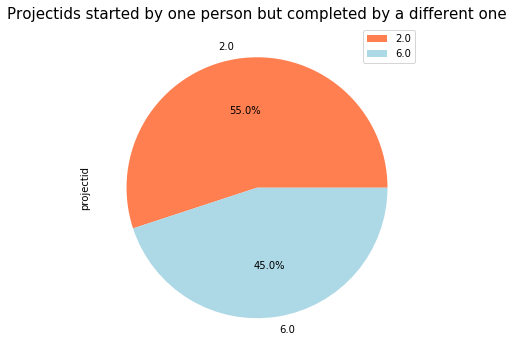

In [199]:
#Exploring visually
diff_people['projectid'].value_counts().plot(kind='pie',autopct='%1.1f%%',legend=True,colors=['coral','lightblue'],figsize=(6,6) )
plt.title('Projectids started by one person but completed by a different one',fontsize=15)

Text(0, 0.5, 'Count')

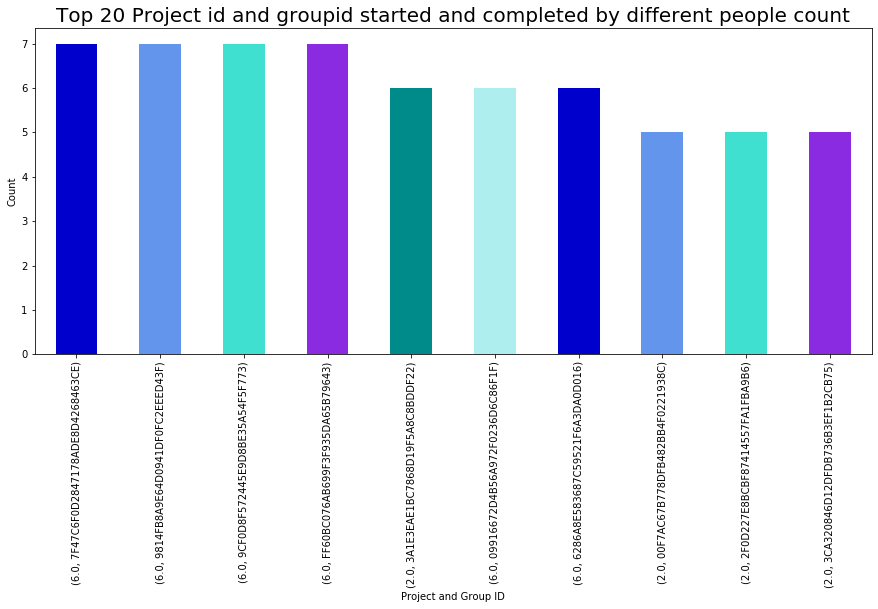

In [200]:
#Exploring top 20 project and group ids started and finished by different people
plt.figure(figsize=(15,6))
a=diff_people.groupby(['projectid','groupid']).size().nlargest(10).plot(kind='bar',color=['mediumblue','cornflowerblue','turquoise','blueviolet','darkcyan','paleturquoise'])
plt.xticks(  rotation='vertical')
plt.title('Top 20 Project id and groupid started and completed by different people count',fontsize=20)
plt.xlabel('Project and Group ID')
plt.ylabel('Count')

Text(0.5, 1.0, 'Tasks transitioned to more than one people ')

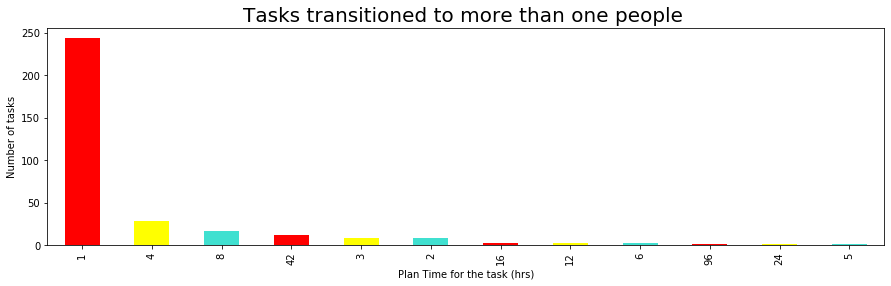

In [201]:
#Diff people planned hours
plt.figure(figsize=(15,4))
diff_people['new_plan_diff_hrs'].value_counts().plot(kind='bar',color=['red','yellow','turquoise'])
plt.xlabel('Plan Time for the task (hrs)')
plt.ylabel('Number of tasks')
plt.title('Tasks transitioned to more than one people ',fontsize=20)

Around 240 records found with 1 hour time taken to complete. About 25 records with 4 hour time taken to complete followed by the rest.

In [202]:
#Saving those records where the time taken to complete tasks were less in a new dataframe
diff_people_time=diff_people.query("(new_plan_diff_hrs >=1 and new_plan_diff_hrs<=8)")

Text(0, 0.5, 'Count by proportion')

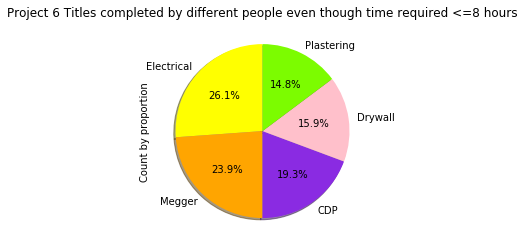

In [203]:
#Plotting records where time taken to complete tasks were less than 8 hours but still completed by a different person under project 6
a=diff_people_time[diff_people_time.projectid==6].groupby('title').size().nlargest().plot(kind='pie',colors=['yellow','orange','blueviolet','pink','lawngreen'],autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Project 6 Titles completed by different people even though time required <=8 hours')
plt.ylabel('Count by proportion')

Text(0, 0.5, 'Count by proportion')

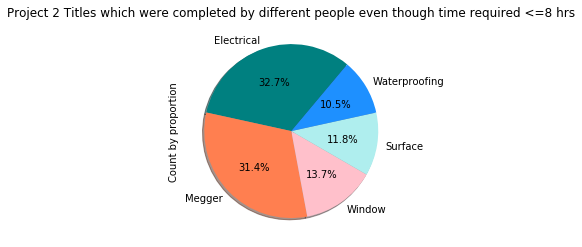

In [204]:
#Project 2 Titles exploration which were completed by different people even when time required <=8hours
b=diff_people_time[diff_people_time.projectid==2].groupby('title').size().nlargest().plot(kind='pie',colors=['teal','coral','pink','paleturquoise','dodgerblue'],autopct='%1.1f%%',shadow=True, startangle=50)
plt.title('Project 2 Titles which were completed by different people even though time required <=8 hrs')
plt.ylabel('Count by proportion')

<b>1.In both Projects 2 and Projects 8, 'Electrical' holds the major chunk of completion by a different person followed by 'Megger'.Although the projects require very less time for completion, they are still being started and finished by different people. This means,the concerned people in these two departments need more training.
    
   2.Groupids:7F47C6F0D2847178ADE8D4268463CE,9814FB8A9E64D0941DF0FC2EEED43F,9CF0D8F572445E9D8BE35A54F5F773,FF60BC076AB699F3F935DA65B79643 from Project6 have the maximum number of tasks being completed by a different person.<br>
    

<br>3.Group ids:3A1E3EAE1BC7868D19F5A8C8BDDF22,00F7AC67B778DFB482BB4F0221938C,2F0D227E8BCBF87414557FA1FBA9B6 from Project 2 have the maximum number of tasks completed by a different person.<br>

<br>The above 7 groups should be looked into as to why this happens? Some questions can be as below:,
<br>1.Could the person under this group  have left the job or  he could have been sick?
<br>2.Were all the people in the group not trained well enough to finish tasks in hand?

Text(0.5, 1.0, 'No. of tasks assigned and Completed on Time')

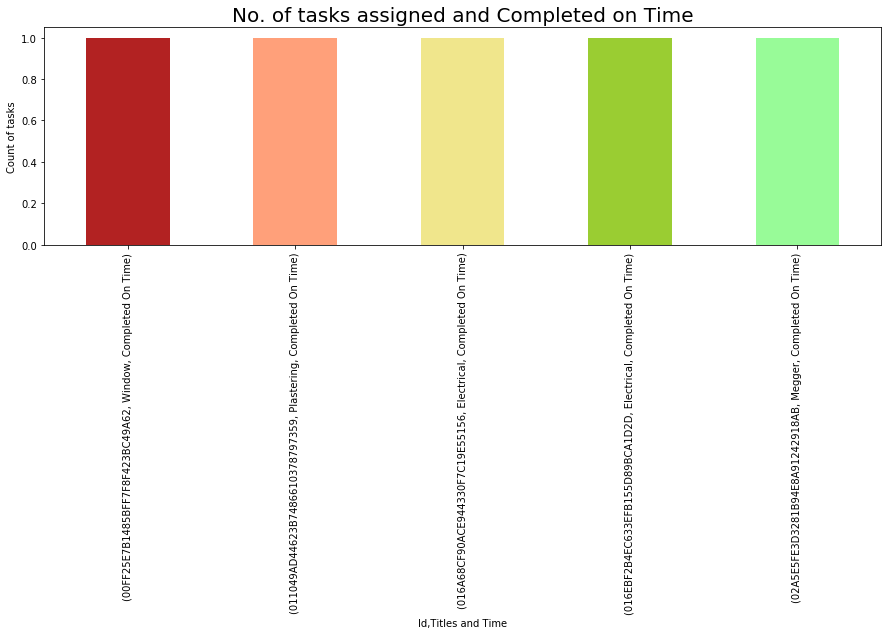

In [205]:
#Checking to see each person was assigned how many tasks and how many were completed on time?
plt.figure(figsize=(15,4))
diff_people.groupby(['id','title','Time']).size().nlargest().plot(kind='bar',color=['firebrick','lightsalmon','khaki','yellowgreen','palegreen'])
plt.xlabel('Id,Titles and Time')
plt.ylabel('Count of tasks')
plt.title('No. of tasks assigned and Completed on Time',fontsize=20)

<b>Each person was only alotted 1 title and they are doing a pretty good job at completing their tasks on time.Maybe some more parallelism could make the schedules shorter.

<h3> Exploring Assignees </h3>

Text(0, 0.5, 'No. of tasks assigned')

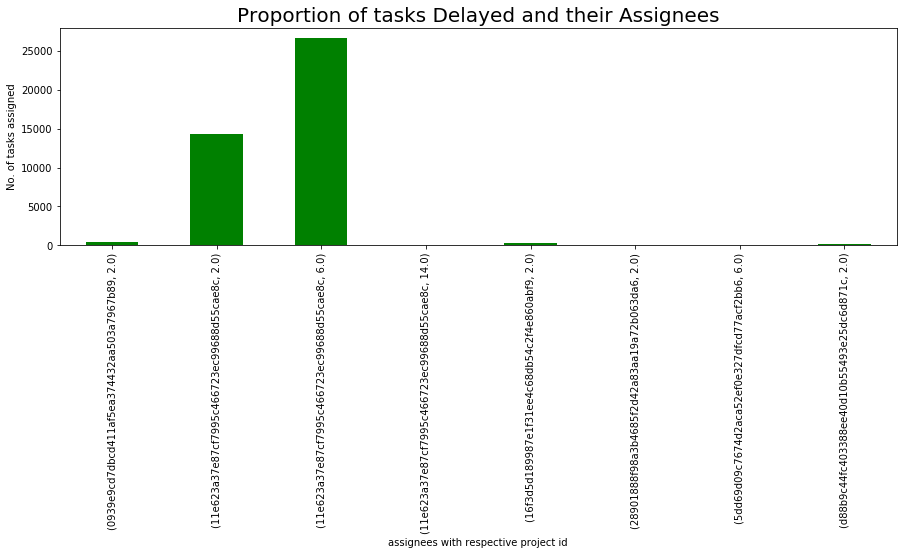

In [206]:
plt.figure(figsize=(15,4))
cons.groupby(['assignees','projectid']).size().plot(kind='bar',color=['green'])
plt.title('Proportion of tasks Delayed and their Assignees',fontsize=20)
plt.xlabel('assignees with respective project id')
plt.ylabel('No. of tasks assigned')

Maximum count of tasks are assigned by assignee: 11e623a37e87cf7995c466723ec99688d55cae8c .

Text(0, 0.5, 'Proportion')

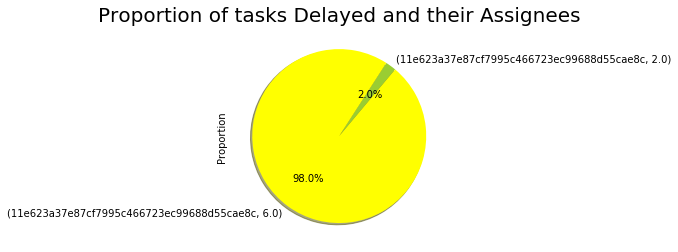

In [210]:
#Checking assignees and how many tasks were delayed
plt.figure(figsize=(15,4))
cons[cons.Time=='Delayed'].groupby(['assignees','projectid']).size().plot(kind='pie',colors=['yellowgreen','yellow'],startangle=50,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of tasks Delayed and their Assignees',fontsize=20)
plt.ylabel('Proportion')

<b>98% of the delays come from Project 6 and the assignee id 11e623a37e87cf7995c466723ec99688d55cae8. The same assignee is for Project Id 2 as well. Looks like there is a lot of burden on this one assignee. Distribution of assigness is required to reduce delays.

<h3> Exploring Previous IDs</h3>

Text(0, 0.5, 'No. of previous ids')

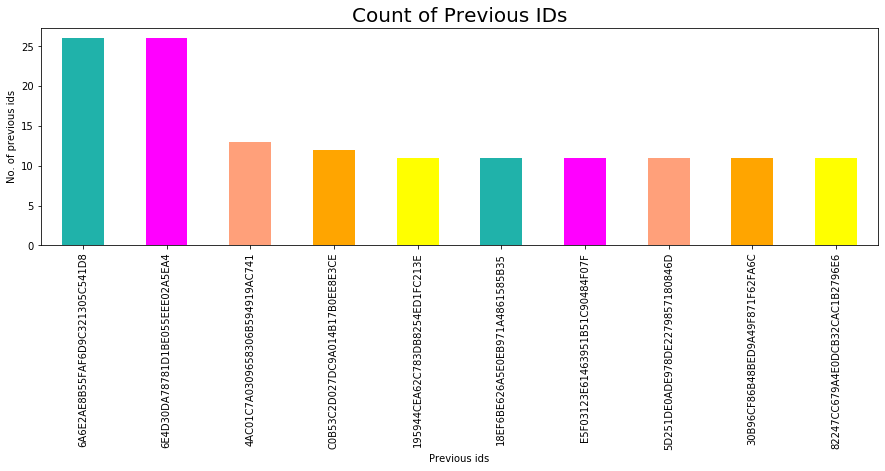

In [211]:
#Checking previous ids and their count
plt.figure(figsize=(15,4))
cons['previousids'].value_counts().nlargest(10).plot(kind='bar',color=['lightseagreen','magenta','lightsalmon','orange','yellow'])
plt.title('Count of Previous IDs',fontsize=20)
plt.xlabel('Previous ids')
plt.ylabel('No. of previous ids')

<b>6E4D30DA78781D1BE055EEE02A5EA4,6A6E2AE8B55FAF6D9C321305C541D8 have the maximum repetitions of previous IDs which means they should be one of the intermediate or end tasks.

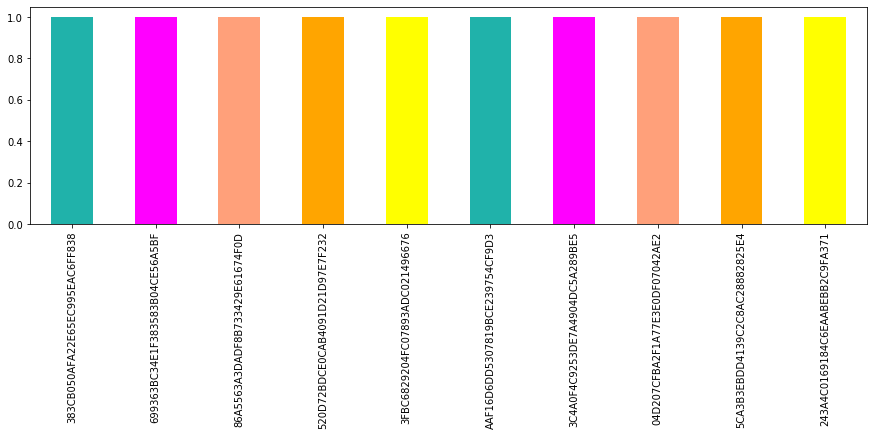

In [212]:
plt.figure(figsize=(15,4))
cons['previousids'].value_counts().nsmallest(10).plot(kind='bar',color=['lightseagreen','magenta','lightsalmon','orange','yellow'])

There are many previous IDs with just 1 count. This creates an ambiguity in concluding about the data.

Text(0.5, 1.0, 'Status vs Previous IDs count')

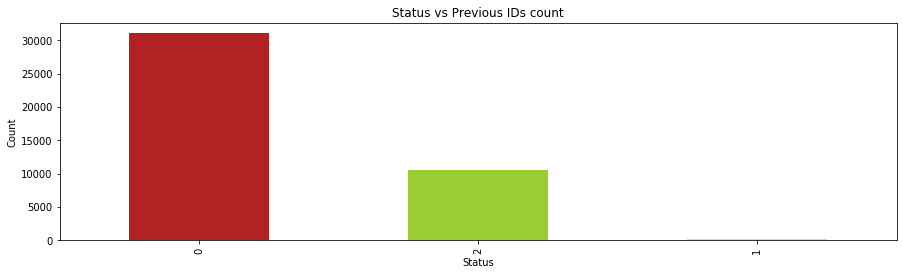

In [213]:
#Exploring further to check previous ids with Status
plt.figure(figsize=(15,4))
cons.groupby(['status','previousids']).size().groupby(level=0).sum().nlargest(50).plot(kind='bar',color=['firebrick','yellowgreen','palegreen'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status vs Previous IDs count')

Status 0 has the maximum number of previous IDs  and Status 1 has the lowest. Status  0 should probably mean the task is in progress considering the fact that it has many previous IDs and Status 1 should probably be the starting tasks which don't need a previous ID. 

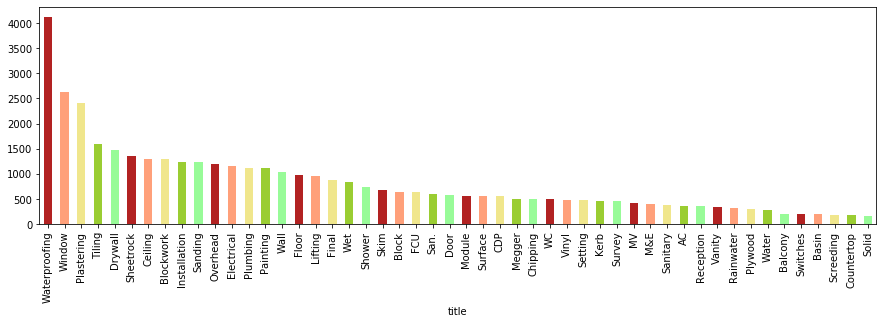

In [214]:
plt.figure(figsize=(15,4))
#new=cons[['title','previousids']]
#pd.pivot_table(new,index=["title"],values=["previousids"], columns=["previousids"], aggfunc = len)

cons.groupby(['title','previousids']).size().groupby(level=0).sum().nlargest(50).plot(kind='bar',color=['firebrick','lightsalmon','khaki','yellowgreen','palegreen'])

Titles Waterproofing has the maximum count of previousids followed by window and Plastering.Solid has the lowest which means 'Solid' should be one of the starting tasks and 'Waterproofing' should be one of the end or middle tasks.But, this data is not enough for providing a solid conclusion.

<b>Previous Ids cannot be used for concluding purposes about any task . Since there are so many unique previous IDs, it is difficult to infer if this id comes from one particular title.A workflow cannot be established.

<a id='conclusions'></a>
<h3> Conclusions</h3>
<br>1. Overall there has been a delay in start of projects however once the activity starts, it is usually completed in the timeframe assigned.But, due to either shortage of manpower or resources, the start dates were delayed. This points to poor preparation of project.</b> <br>
<br>2. Project id 6 comprises of around 63% of projects followed by 36% from Project id 2 and the rest by Project id 14.The Top 5 group ids with maximum count are as follows:</b>
<br><ul>a. FEEDAED56007409495F2836FD09A23 from Proj 2
   <br> b. 94CE9BFDBCEEC0E7B287BB4431DE1F from Proj 6
   <br> c. 228B39C6305362808AF9FA348F003C from Proj 6
   <br> d. 44A57F4F094F349F6510127255736D from Proj 6
   <br> e. 5A4824713D6EB4EAF5D457CA0D89A1 from Proj 6</ul>
3.'Plastering' under Project id 6 and 'Lifting' under project id 2 were the first activities to be delayed by a duration >30 days. This could be because there were no resources or raw materials required to do this activity. The details of the root cause need to be looked into. Since, the rest of the processes operate in sequence, the entire project as a whole got delayed.<br>
<br>4. There are few records where the Time differences(Tracking-planned)in hours are negative. They don't make much sense since it means the tracking start time and tracking end time was started and ended at the same time and the planned time was assigned greater than the tracking time. Hence, we get <b>time_diff in negative.</b> Such data should be investigated further.<br>
<br>5. Team Ids: B6C3962BB9B5EE0DC0EF1C87FF5A0E,28C2A0C82DEE2D65DD2682A7835102,91EEF8DA55584D7FAC49498F586EBE take the most time to complete their  tasks on time delaying the whole schedule.They should be monitored.<br>
<br>6.Around 21 records have been found where there has been a delay by 10 hours followed by 8 records where the delay is 9 hours. There is one exceptional record where the delay has been by 2162 hours which is 90 days. <br>
<br>7.Title <b>'Lifting' </b>has the maximum count for completing ahead of time followed by Waterproofing.Hence, we could either reduce the planned time for this title and add it to the titles which contribute to most delays for project completion on time. When it comes to overall planning, there is room for reducing plan time specially for the lifting activities in order to compensate for delays on other titles. <br>  
<br>8.We see that all the 50 records under 'Delayed' category come under Status number 2 .<b>Nothing much can be inferred using this variable.<br></b>
<br>9.'Drywall'contributes to maximum delays followed by 'Waterproofing'.These tasks have been given around 1 or 2 or 3 hours for Drywall and 6 hours for Waterproofing .To reduce delays in the future, <b>planned time should be increased for these titles </b><br>
<br>10.Group ids under project id 6 :E846E5740959BF97E660575C45A33D, 7054AC1B9163982DDC4BD82C0AFB20 and B4DE3003585371B7F1B3396B032CFE contribute to most delays.<b> They should be monitored.</b> <br>
<br>11.In both Projects 2 and Projects 6, 'Electrical' holds the major chunk of completion by a different person followed by 'Megger'.Although the projects require very less time for completion, they are still being started and finished by different people. <b>This means,the concerned people in these two departments might need more training.</b><br>
    
<br>12.Groupids:7F47C6F0D2847178ADE8D4268463CE,9814FB8A9E64D0941DF0FC2EEED43F,9CF0D8F572445E9D8BE35A54F5F773,FF60BC076AB699F3F935DA65B79643 from Project6 have the maximum number of tasks being completed by a different person.<br>
    Group ids:3A1E3EAE1BC7868D19F5A8C8BDDF22,00F7AC67B778DFB482BB4F0221938C,2F0D227E8BCBF87414557FA1FBA9B6 from Project 2 have the maximum number of tasks completed by a different person.<br>
The above 7 groups should be looked into as to why this happens? Some questions can be as below:,
<b><ul>1.Could the person under this group  have left the job or  he could have been sick?<br>
 2.Were all the people in the group not trained well enough to finish tasks in hand?</ul></b>

<br> 12.Each person was only alotted 1 title and they are doing a pretty good job at completing their tasks on time.<b>Maybe some more parallelism could make the schedules shorter.</b></br>

<br>13. 98% of the delays come from Project 6 and the assignee id 11e623a37e87cf7995c466723ec99688d55cae8. The same assignee is for Project Id 2 as well. Looks like there is a lot of burden on this one assignee.<b> Distribution of assigness is required to reduce delays.</b>
<br>
<br> 14.Previous Ids cannot be used for concluding purposes about any task . Since there are so many unique previous IDs, it is difficult to infer if this id comes from one particular title.A workflow cannot be established.


